## Applied Machine Learning, Module 1:  A simple classification task

### Import required modules and load data file

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

In [3]:
#import file fruit_data_with_colors.txt
fruits = pd.read_table("fruit_data_with_colors.txt")

In [5]:
# look at the data
fruits
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


#### What is the shape of our data?

In [6]:
# What is the shape of our data
fruits.shape

(59, 7)

In [9]:
fruits.fruit_label.unique(), fruits.fruit_name.unique()
# { 1: apple, 2:mandarin, 3:orange }

(array([1, 2, 3, 4], dtype=int64),
 array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object))

### Create a mapping from fruit label value to fruit name to make results easier to interpret

In [12]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

### Split the data into features and labels

In [13]:
# Assign the features to a variable called 'X' and labels to a variable called y
#X = fruits[['mass', 'width', 'height']]
# Optional:
X = fruits[["mass", "width", "height", "color_score"]]
y = fruits["fruit_label"]

## Create train-test split

So to create training and test sets from a input dataset, Scikit-learn provides a handy function that will do this split for us, called, not surprisingly, train test split. And here's an example of how we're going to use it. 

This function randomly shuffles the dataset and splits off a certain percentage of the input samples for use as a training set, and then puts the remaining samples into a different variable for use as a test set. So in this example, we're using a 75-25% split of training versus test data. And that's a pretty standard relative split that's used. It's a good rule of thumb to use in deciding what proportion of training versus test might be helpful. 
9:39
As a reminder, when we're using Scikit-learn, we'll denote the data that we have using different flavors of the variable X, capital X, which is typically a two dimensional array or data frame. 

And the notation we'll use for labels will be typically based on lowercase y, which is usually a one dimensional array, or a scalar. 

Now, note the use of the random state parameter in the train_test_split function. So this random state parameter provides a seed value to the function's internal random number generator. 

If we choose different values for that seed value, that will result in different randomized splits for training and test. So, if we want to get the same training and test split each time, we just make sure to pass in the same value of the random state parameter. And so here, we're going to set that parameter to zero for all our examples. 

The training test split function will put the training set here into X_train, the test set into X_test, the training labels into y_train, and the test labels into y_test. So this is a 75-25 partitioning of the original data into these two parts. 

### Split the data into a training and test set

In [17]:
# Assign them to variables X_train, X_test, y_train, y_test
# default is 75% / 25% train-test split
# this random state parameter provides a seed value to the function's internal random number generator.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
y_train.head()

42    3
48    4
7     2
14    1
32    3
Name: fruit_label, dtype: int64

### Print all shapes

In [23]:
print("training", X_train.shape )
print("test", X_test.shape )
print("label training", y_train.shape )
print("label test ", y_test.shape )


training (44, 4)
test (15, 4)
label training (44,)
label test  (15,)


### Examining the data

<IPython.core.display.Javascript object>


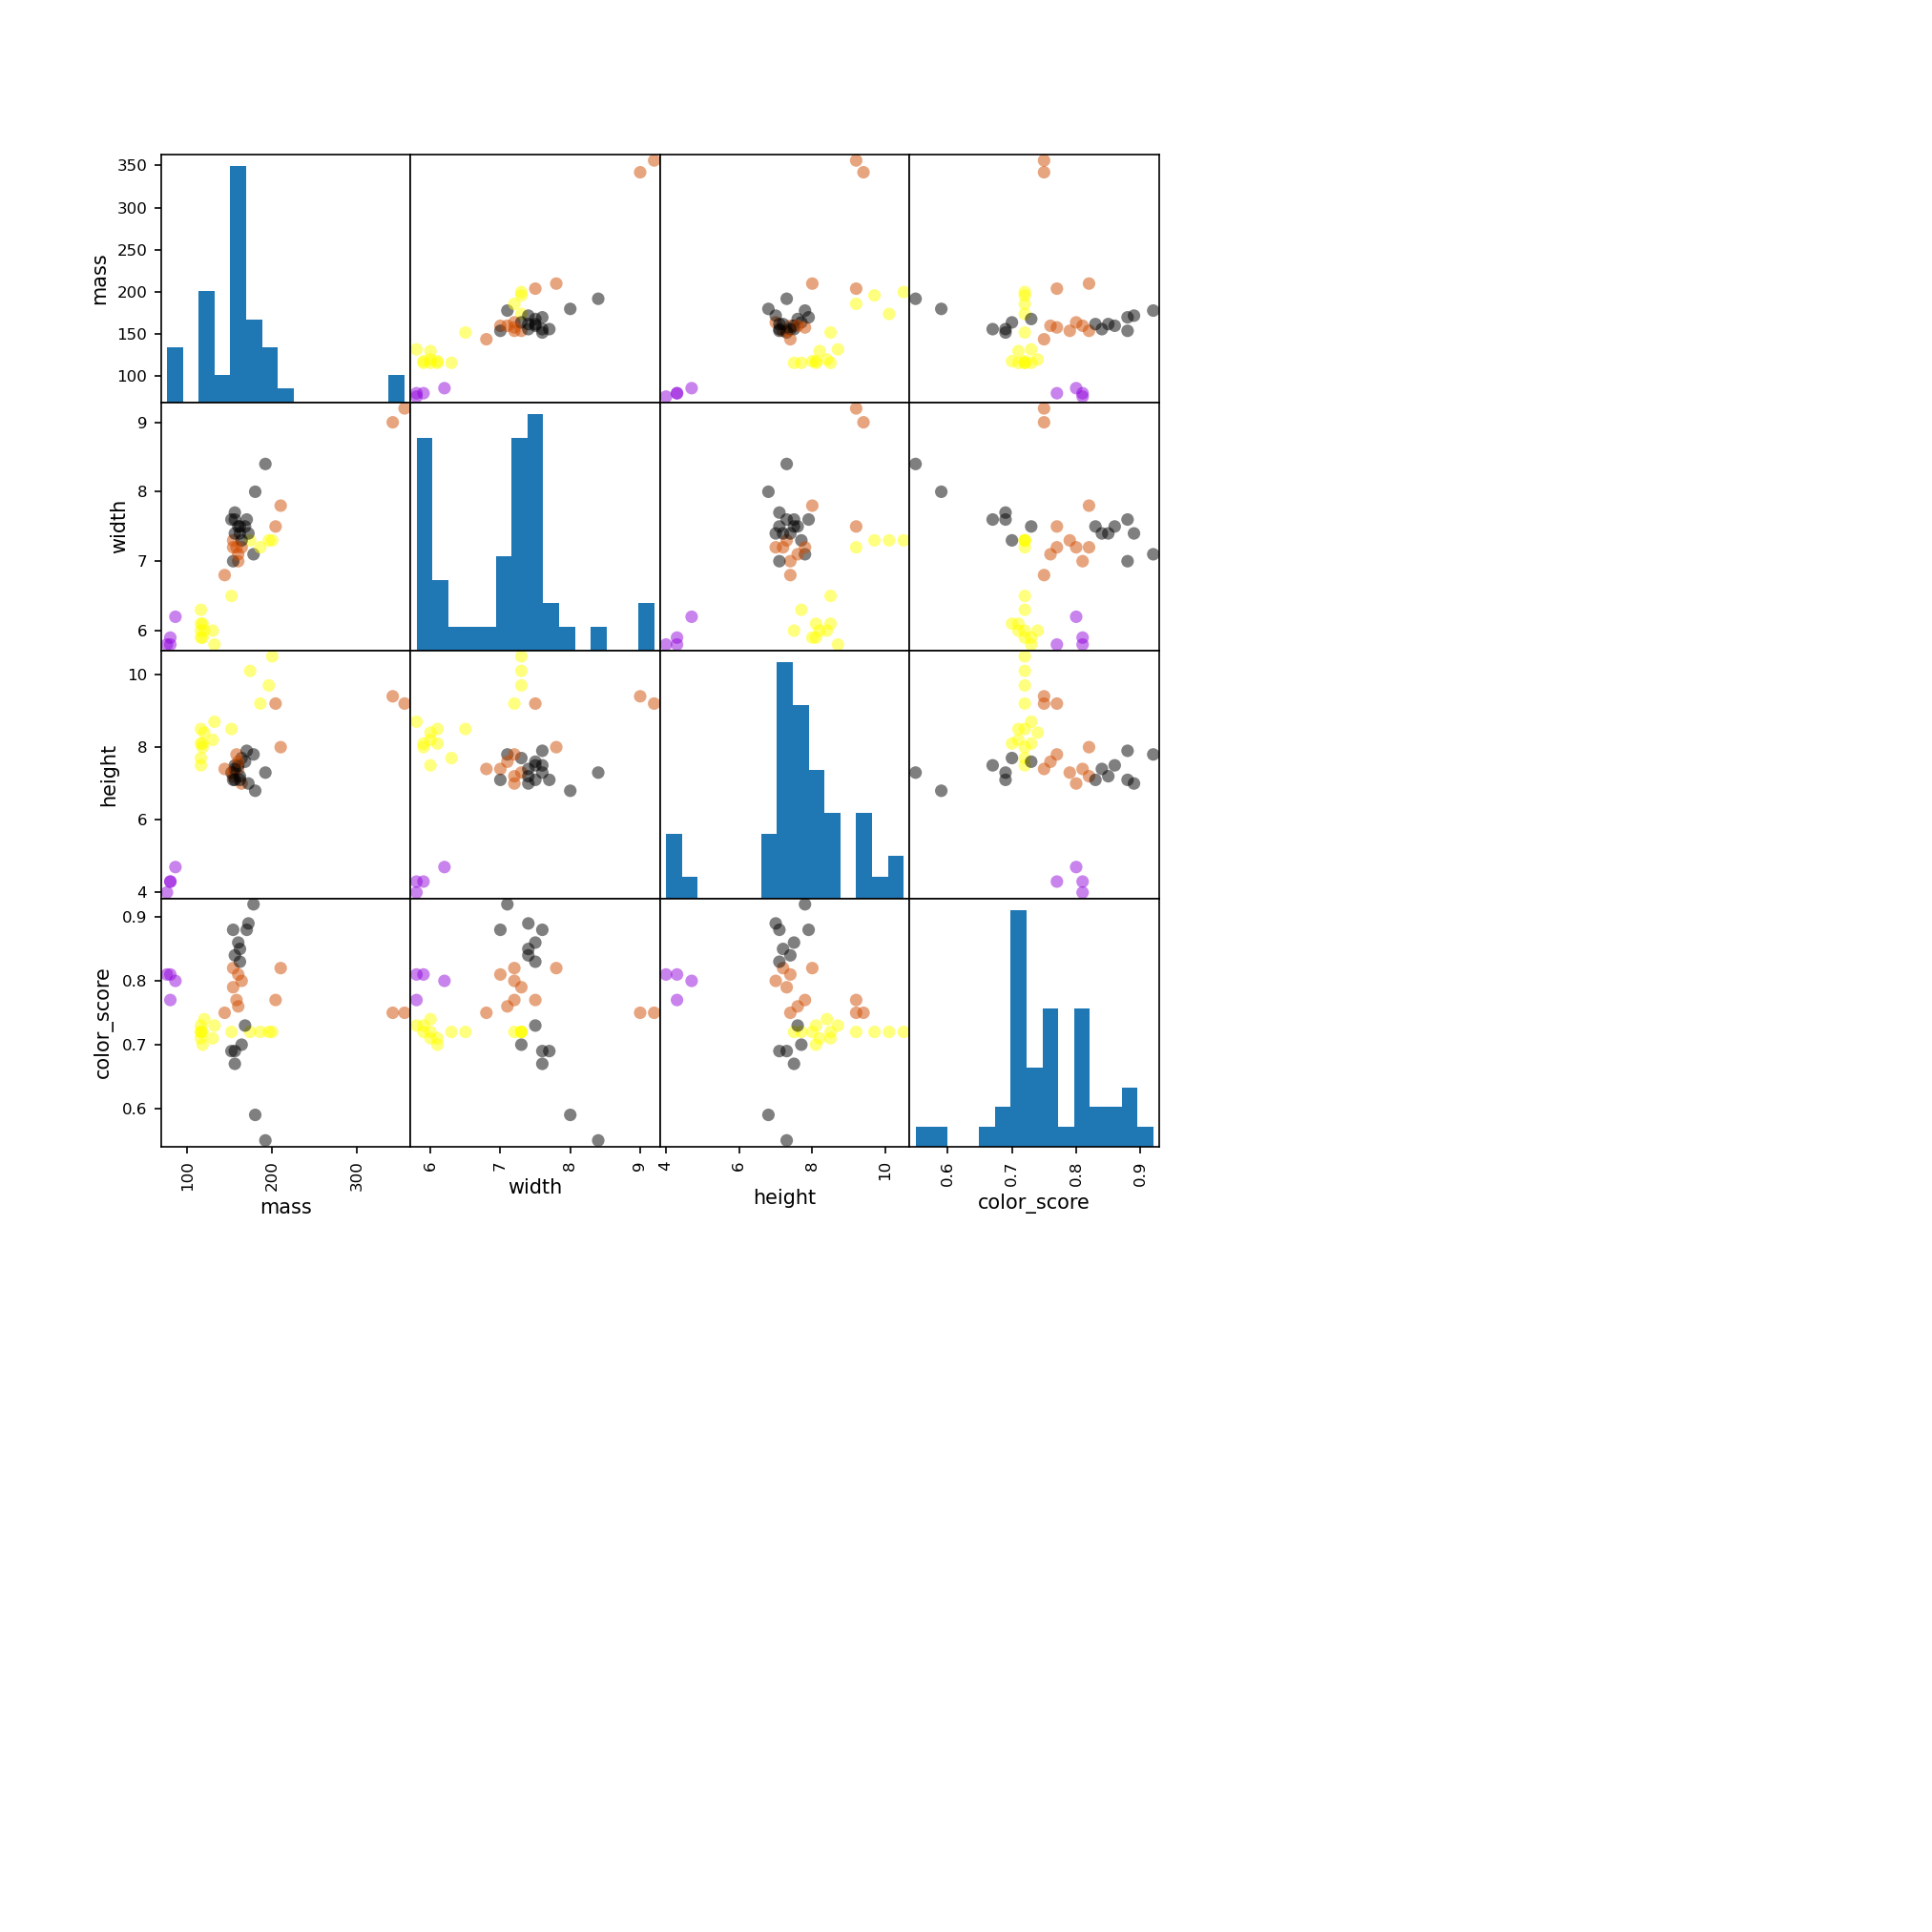

In [24]:
# plotting a scatter matrix
from matplotlib import cm

cmap = cm.get_cmap("gnuplot")

scatter = scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

<IPython.core.display.Javascript object>


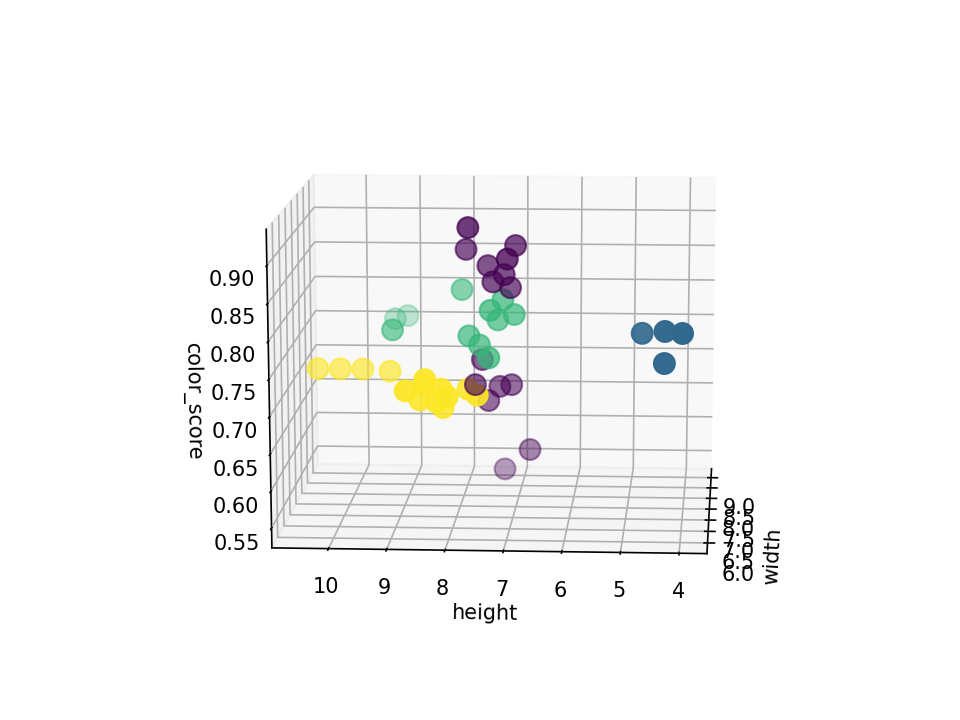

In [25]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')

ax.set_zlabel('color_score')
plt.show()

### Create classifier object

Interesting part is about to happen right now. Building or selecting the right classifier for your algorithm. Choosing a right metric and adopting these

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

### Train the classifier (fit the estimator) using the training data

In [29]:
# 🏋️ train your classifier 
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

### Estimate the accuracy of the classifier on future data, using the test data

In [30]:
knn.score(X_test, y_test)

0.5333333333333333

In [31]:
X.head()

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79


### Use the trained k-NN classifier model to classify new, previously unseen objects

In [35]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
example = [[20, 4.3, 5.5, 0.8]]
classified_label = knn.predict(example)
lookup_fruit_name[classified_label[0]]

'mandarin'

In [ ]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm

### Plot the decision boundaries of the k-NN classifier

In [36]:
from sklearn import neighbors
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import numpy


def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].to_numpy()
    y_mat = y.to_numpy()

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, mesh_step_size),
                         numpy.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

        
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    
    plt.show()

<IPython.core.display.Javascript object>


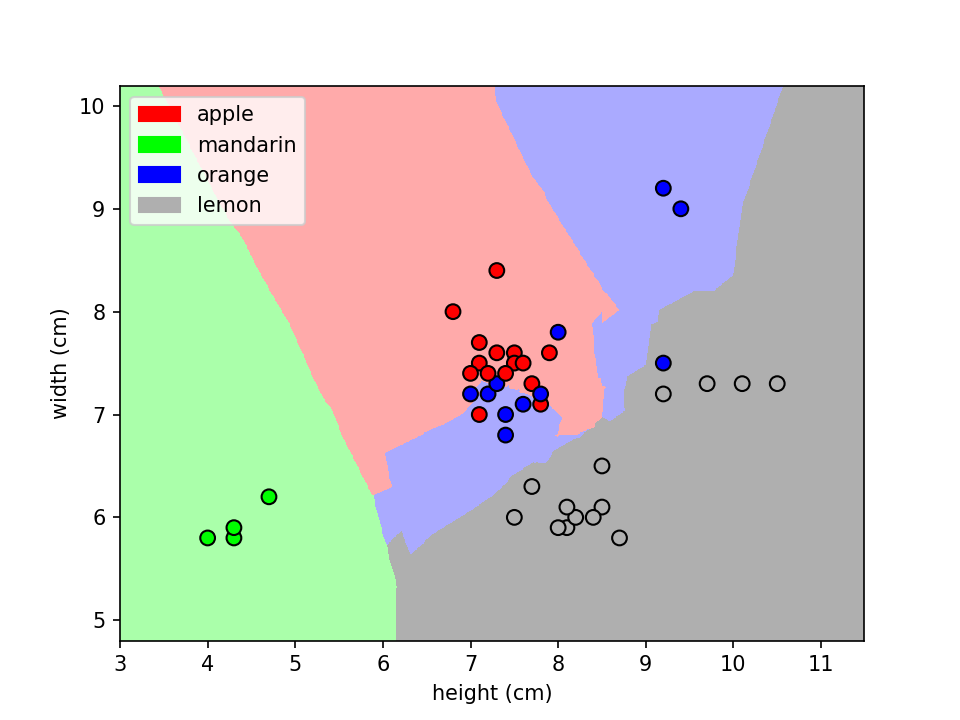

In [38]:
# choose 5 nearest neighbors
plot_fruit_knn(X_train,y_train, 5, "uniform")

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

<IPython.core.display.Javascript object>


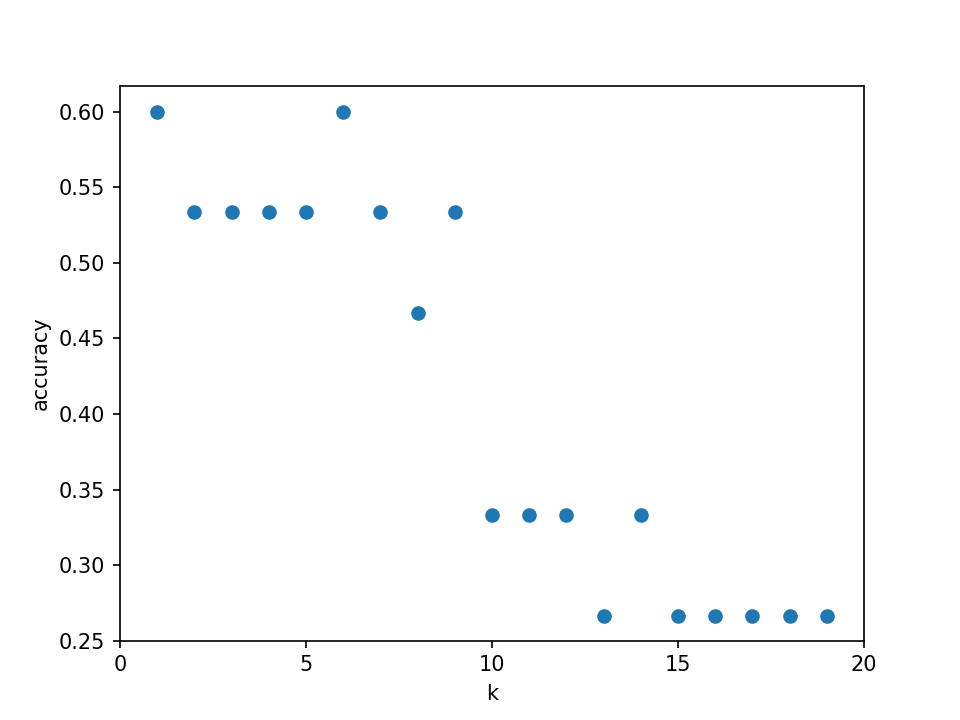

In [39]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

### How sensitive is k-NN classification accuracy to the train/test split proportion? (rendering may take some time)

<IPython.core.display.Javascript object>


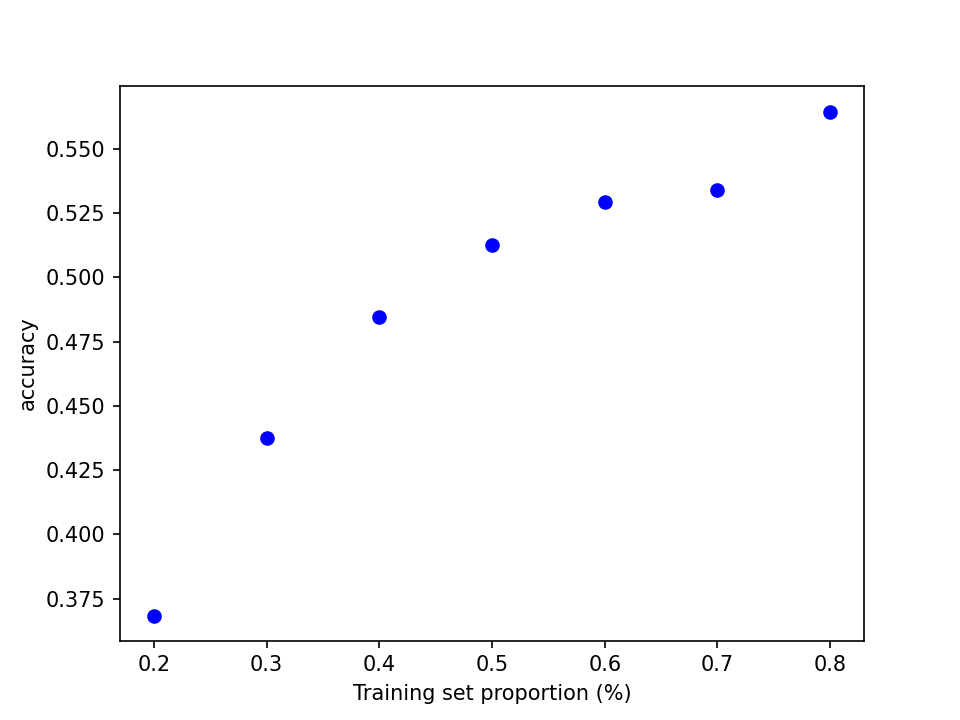

In [40]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');